In [247]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

digits = datasets.load_digits() # load digit datasets

In [248]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [249]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [250]:
digits.data.shape

(1797, 64)

In [251]:
digits.images.shape

(1797, 8, 8)

In [252]:
digits.images[:2] # feature of datasets

array([[[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
        [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
        [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
        [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
        [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
        [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
        [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
        [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
        [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
        [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
        [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
        [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]]])

In [253]:
digits.target.shape

(1797,)

In [254]:
digits.target[:40] # output of datasets

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9])

In [255]:
np.isnan(digits.images).sum() # find missing data

0

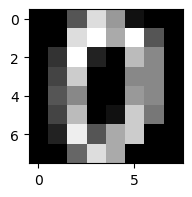

In [256]:
img = digits.images[0]
plt.figure(figsize = (2,2))
plt.imshow(img, cmap = plt.cm.gray)
plt.show()

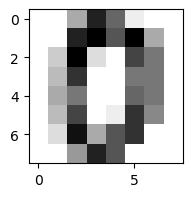

In [257]:
plt.figure(figsize = (2,2))
plt.imshow(img, cmap = plt.cm.gray_r) # switch values of color if smallest is dark tone
plt.show()

In [258]:
def visual_multi(i):
    '''
    show multiple visual of datasets

    :param i: index need to start
    :output => plt.show() 
    '''
    nplots = 40 # quatity feature of datasets
    plt.figure(figsize = (8,4))
    for j in range(nplots):
        plt.subplot(4, 10, j+1) # 4 rows, 10 columns, j is frame by index of j
        plt.imshow(digits.images[i+j], cmap = 'binary') # output type image
        plt.title(digits.target[i+j]) # เอา digits.target มาเป็น title ของแต่ละภาพ
        plt.axis('off') # don't show border
    plt.show()

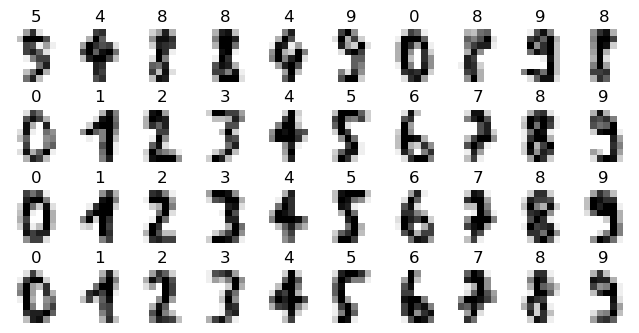

In [259]:
visual_multi(120)

In [260]:
n_smaple = len(digits.images) # quantity feature of datasets (1797)
n_smaple

1797

In [261]:
X = digits.images.reshape((n_smaple, -1)) # digits.images from 3D to 2D
X[:1]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [262]:
y = digits.target # output of datasets
y[:20]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [263]:
def get_data(n):
    '''
    get feature (digits.images) and output (digits.targets) of datasets

    :output => X, y
    '''
    for i in range(n):
        print(f'Feature {i+1} : {X[i]}')
        print(f'Output {i+1} : {y[i]}')
        print('---'*20)

get_data(20)

Feature 1 : [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
Output 1 : 0
------------------------------------------------------------
Feature 2 : [ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
  3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
 16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
  0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]
Output 2 : 1
------------------------------------------------------------
Feature 3 : [ 0.  0.  0.  4. 15. 12.  0.  0.  0.  0.  3. 16. 15. 14.  0.  0.  0.  0.
  8. 13.  8. 16.  0.  0.  0.  0.  1.  6. 15. 11.  0.  0.  0.  1.  8. 13.
 15.  1.  0.  0.  0.  9. 16. 16.  5.  0.  0.  0.  0.  3. 13. 16. 16. 11.
  5.  0.  0.  0.  0.  3. 11. 16.  9.  0.]
Output 3 : 2
--------------------

In [264]:
from sklearn.model_selection import train_test_split
# split datasets to training and testing 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size = 0.4, # 40% for testing datasets
    random_state = 20 # random_state for random as same every run
)

X_train.shape, y_train.shape

((1078, 64), (1078,))

In [265]:
from sklearn import svm
# what is SVM?
'''
- svm is support vector machine for supervised learning algorithm classification and regression
- supervised learning  has feature and output to train the model
'''
model = svm.SVC(gamma = 'scale') # create model SVM
model.fit(X_train, y_train) # train model with training datasets

SVC()

In [266]:
# try to test model with testing datasets
y_pred = model.predict(X_test)
y_pred[:20] # predict output from testing datasets

array([0, 7, 9, 5, 8, 1, 3, 3, 7, 0, 9, 4, 7, 4, 0, 1, 1, 8, 1, 3])

In [267]:
# compare y_test and y_pred
print('Actual output : ', y_test[:20])
print('Predicted output : ', y_pred[:20])

Actual output :  [0 7 9 5 8 1 3 3 7 0 9 4 7 4 0 1 1 8 1 3]
Predicted output :  [0 7 9 5 8 1 3 3 7 0 9 4 7 4 0 1 1 8 1 3]


In [268]:
# function find wrong prediction
def compare_output_false(y_test, y_pred):
    '''
    compare actual output and predicted output to calculate accuracy

    :param y_test: actual output from testing datasets
    :param y_pred: predicted output from model
    :output => result of comparison
    '''
    false_count = 0

    for r in range(y_pred.shape[0]):
        correct = y_pred[r] - y_test[r]
        if correct != 0:
            false_count += 1
            print(f'Index {r} => {y_pred[r]}\nActual output : {y_test[r]}\n-------')
            
    
    if false_count == 0:
        print('All prediction is correct')

        
# test function
if __name__ == '__main__':
    compare_output_false(y_test, y_pred)

Index 98 => 8
Actual output : 9
-------
Index 111 => 9
Actual output : 5
-------
Index 268 => 8
Actual output : 3
-------
Index 338 => 8
Actual output : 4
-------
Index 351 => 5
Actual output : 9
-------
Index 427 => 5
Actual output : 3
-------
Index 434 => 5
Actual output : 6
-------
Index 449 => 9
Actual output : 7
-------
Index 470 => 7
Actual output : 3
-------
Index 523 => 8
Actual output : 3
-------
Index 562 => 7
Actual output : 9
-------
Index 638 => 7
Actual output : 9
-------
Index 657 => 7
Actual output : 9
-------


In [269]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 

print('Accuracy Score : {:.4f}'.format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

Accuracy Score : 0.9819
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       1.00      1.00      1.00        75
           2       1.00      1.00      1.00        63
           3       1.00      0.95      0.97        80
           4       1.00      0.99      0.99        75
           5       0.96      0.99      0.97        71
           6       1.00      0.99      0.99        71
           7       0.95      0.99      0.97        80
           8       0.94      1.00      0.97        64
           9       0.97      0.94      0.95        77

    accuracy                           0.98       719
   macro avg       0.98      0.98      0.98       719
weighted avg       0.98      0.98      0.98       719



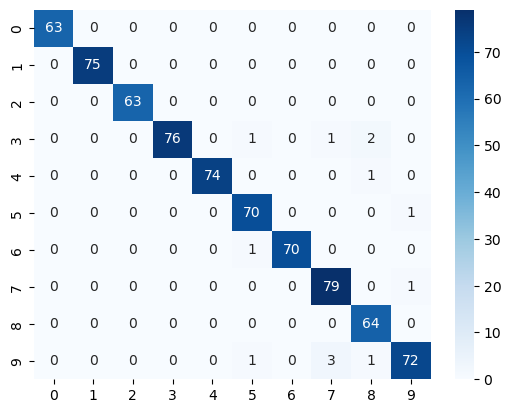

In [270]:
import seaborn as sns 
# heatmap is function to show confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = 'd', cmap = 'Blues')
plt.show()

In [271]:
# check index wrong prediction
idx_miss = np.where(y_test != y_pred) # find y_pred != y_test
idx_miss

(array([ 98, 111, 268, 338, 351, 427, 434, 449, 470, 523, 562, 638, 657],
       dtype=int64),)

In [272]:
print('y_test :', y_test[idx_miss]) # actual output
print('y_pred :', y_pred[idx_miss]) # predicted output

y_test : [9 5 3 4 9 3 6 7 3 3 9 9 9]
y_pred : [8 9 8 8 5 5 5 9 7 8 7 7 7]


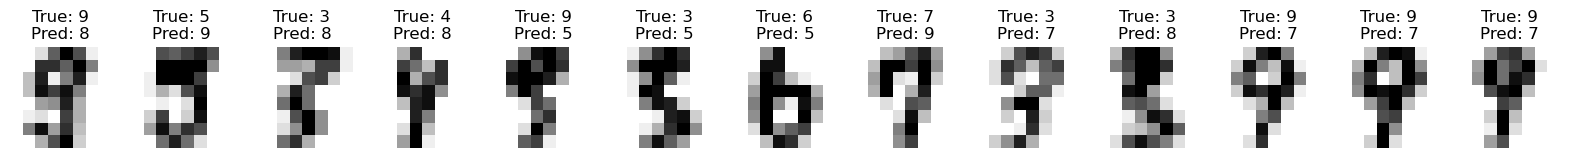

In [273]:
# plot show images that model predict wrong
fig = plt.figure(figsize = (20,5))

for i in range(len(idx_miss[0])):
    plt.subplot(1, len(idx_miss[0]), i+1)
    plt.imshow(X_test[idx_miss[0][i]].reshape(8,8), cmap = 'binary')
    plt.title(f'True: {y_test[idx_miss][i]}\nPred: {y_pred[idx_miss][i]}')
    plt.axis('off') # don't show border

plt.show()

In [274]:
# cross validation
from sklearn.model_selection import cross_val_score

model = svm.SVC(gamma = 'scale')

cvs = cross_val_score(model, X, y, cv = 5)
print(cvs.round(4))
cvs.mean().round(4)

[0.9611 0.9444 0.9833 0.9889 0.9387]


0.9633

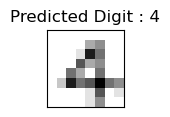

In [275]:
# import lib for predict new data
# The cell require to install Pillow package
from PIL import Image, ImageOps
from sklearn import svm

model = svm.SVC(gamma = 'scale')
model.fit(X, y) # train model with all datasets

imgfile = './img_digits_new/digit4.png' # path of image file
# Check if the file exists before opening

img = Image.open(imgfile).convert('L') # read image file gray scale
img = ImageOps.invert(img) # invert color image
img = img.resize((8,8)) # resize image to 8x8 pixels
pixel = np.array(img) # convert image to array size 8x8
pixel = pixel / 255.0 * 16.0 # change Pixel from 0-255 to 0-16
pixel = pixel.astype(int) # change type to integer

my_digit = pixel.reshape(1, -1) # reshape from 8x8 to 1x64
predict = model.predict(my_digit) # predict new data

plt.figure(figsize = (1,1))
plt.imshow(pixel, cmap = plt.cm.binary)
plt.title(f'Predicted Digit : {predict[0]}')
plt.xticks([])
plt.yticks([])
plt.show()

Predict image file : ./img_digits_new/digit0.png


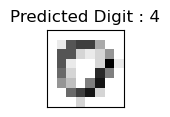

Predict image file : ./img_digits_new/digit1.png


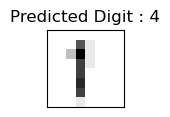

Predict image file : ./img_digits_new/digit2.png


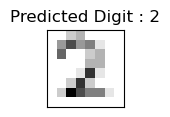

Predict image file : ./img_digits_new/digit3.png


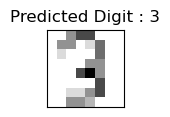

Predict image file : ./img_digits_new/digit4.png


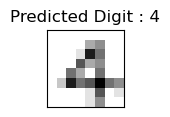

Predict image file : ./img_digits_new/digit5.png


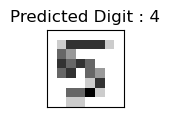

Predict image file : ./img_digits_new/digit6.png


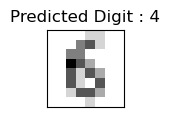

Predict image file : ./img_digits_new/digit7.png


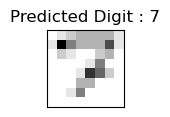

Predict image file : ./img_digits_new/digit8.png


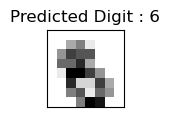

Predict image file : ./img_digits_new/digit9.png


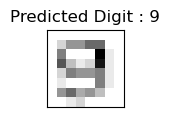

In [276]:
def predict_new_image(imgfile):
    '''
    predict new image file

    :param imgfile: path of image file
    :output => predicted digit
    '''

    model = svm.SVC(gamma = 'scale')
    model.fit(X, y) # train model with all datasets

    # Check if the file exists before opening

    img = Image.open(imgfile).convert('L') # read image file gray scale
    img = ImageOps.invert(img) # invert color image
    img = img.resize((8,8)) # resize image to 8x8 pixels
    pixel = np.array(img) # convert image to array size 8x8
    pixel = pixel / 255.0 * 16.0 # change Pixel from 0-255 to 0-16
    pixel = pixel.astype(int) # change type to integer

    my_digit = pixel.reshape(1, -1) # reshape from 8x8 to 1x64
    predict = model.predict(my_digit) # predict new data

    plt.figure(figsize = (1,1))
    plt.imshow(pixel, cmap = plt.cm.binary)
    plt.title(f'Predicted Digit : {predict[0]}')
    plt.xticks([])
    plt.yticks([])
    plt.show()

if __name__ == '__main__':
    # add img data files to dictionary because image files are multiple
    imgfiles = {}
    for i in range(10):
        imgfiles[i] = f'./img_digits_new/digit{i}.png'


    # test function
    for key, value in imgfiles.items():
        print(f'Predict image file : {value}')
        predict_new_image(value)

In [277]:
# build dataset from image files
from PIL import Image, ImageOps

def build_dataset():
    '''
    build dataset from image files

    :return => X_new, y_new
    '''
    X_new = []
    y_new = []

    for i in range(10):
        imgfile = f'./img_digits_new/digit{i}.png' # path of image file
        img = Image.open(imgfile).convert('L') # read image file gray scale
        img = ImageOps.invert(img) # invert color image
        img = img.resize((8,8)) # resize image to 8x8 pixels

        pixel = np.array(img) # convert image to array size 8x8
        pixel = pixel / 255.0 * 16.0 # change Pixel from 0-255 to 0-16
        pixel = pixel.astype(int) # change type to integer

        X_new.append(pixel.reshape(1, -1)[0]) # reshape from 8x8 to 1x64 and add to X_new
        y_new.append(i) # add output to y_new

    return np.array(X_new), np.array(y_new)

In [278]:
X_new, y_new = build_dataset()
X_new, y_new

(array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  8,  9,  9,  4,  0,  0,
          0,  8,  8,  2,  1,  2,  5,  0,  0,  8,  1,  0,  0,  2, 12,  1,
          0,  7,  2,  0,  0, 10,  6,  0,  0,  5,  3,  0,  6, 11,  0,  0,
          0,  0,  7,  9, 11,  2,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  8,  1,  0,  0,  0,
          0,  0,  3, 12,  1,  0,  0,  0,  0,  0,  0,  9,  1,  0,  0,  0,
          0,  0,  0,  9,  0,  0,  0,  0,  0,  0,  0, 10,  0,  0,  0,  0,
          0,  0,  0,  9,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0],
        [ 0,  0,  2,  3,  0,  0,  0,  0,  0,  4,  7,  4,  5,  1,  0,  0,
          0,  6,  0,  0,  2,  3,  0,  0,  0,  0,  0,  0,  3,  3,  0,  0,
          0,  0,  0,  1,  8,  1,  0,  0,  0,  0,  2,  8,  2,  0,  0,  0,
          0,  2, 10,  7,  5,  5,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  3,  5,  5,  0,  0,  0,  0,  3,  3,  0,  1,  4,  0,  0,
          0,  1,  0,  0,  0,  4,  0,  0,  0,  0,

In [279]:
import pandas as pd

df = pd.DataFrame(X_new) # X_new is series of array (feature)

X = pd.concat([pd.DataFrame(X), df])  # Convert X to DataFrame, concatenate with df, and convert back to numpy array
y = pd.concat([pd.Series(y), pd.Series(y_new)]) # add new output to y by concat because y is series and y_new is series

model.fit(X, y) # train model with new datasets

SVC()

Predict image file : ./img_digits_new/digit0.png


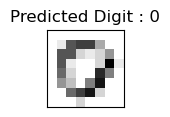

Predict image file : ./img_digits_new/digit1.png


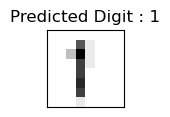

Predict image file : ./img_digits_new/digit2.png


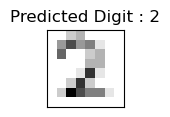

Predict image file : ./img_digits_new/digit3.png


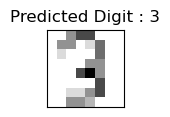

Predict image file : ./img_digits_new/digit4.png


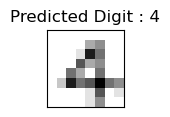

Predict image file : ./img_digits_new/digit5.png


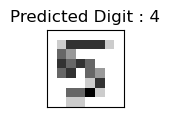

Predict image file : ./img_digits_new/digit6.png


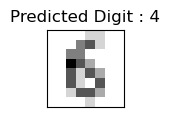

Predict image file : ./img_digits_new/digit7.png


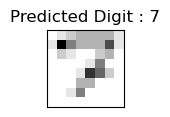

Predict image file : ./img_digits_new/digit8.png


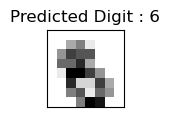

Predict image file : ./img_digits_new/digit9.png


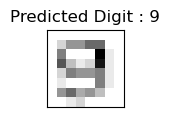

In [280]:
'''
try to predict new image files again by function predict_new_image()
from cell before
'''

for key, value in imgfiles.items():
    print(f'Predict image file : {value}')
    predict_new_image(value)